<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Conv_Neural_Network_with_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass image classification

We have just been through a bunch of the following steps with a binary classification problem. Now we are going to step things up a notch with 10 classes of food (multiclass)

1. Become one with the data.
2. Preprocess the data (get it ready for model).
3. Create a model (start with baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting.
7. Repeat until satisfied

# Import and become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-08-04 18:14:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2023-08-04 18:15:02 (21.4 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [2]:
# Setup the train and test set directories
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [3]:
#Visualize our train images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder ) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f"image shape : {img.shape}")
  return img


['2311474.jpg']
image shape : (512, 512, 3)


array([[[ 16,  10,  14],
        [ 16,  10,  14],
        [ 15,   9,  13],
        ...,
        [ 54,  25,  27],
        [ 53,  27,  30],
        [ 53,  27,  30]],

       [[ 17,  11,  15],
        [ 16,  10,  14],
        [ 16,  10,  14],
        ...,
        [ 57,  28,  30],
        [ 56,  30,  33],
        [ 57,  31,  34]],

       [[ 17,  11,  15],
        [ 17,  11,  15],
        [ 16,  10,  14],
        ...,
        [ 59,  30,  32],
        [ 59,  33,  36],
        [ 59,  33,  36]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [198, 131,  78],
        [186, 116,  64],
        [193, 123,  71]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [216, 149,  96],
        [202, 132,  80],
        [200, 131,  76]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 163, 110],
        [216, 147,  92],
        [206, 137,  82]]

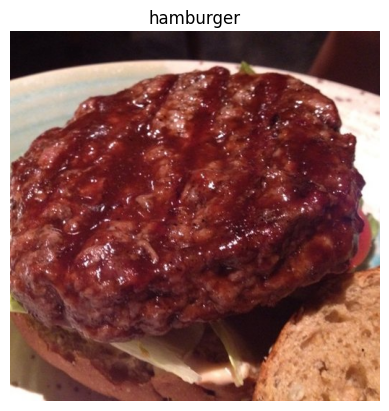

In [4]:
view_random_image(target_dir = "/content/10_food_classes_all_data/train/" , target_class = "hamburger")

# All process:

1. Load our images.
2. Preprocess our images.
3. Build a CNN.
4. Compile a CNN.
5. Fit the CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_datagen = ImageDataGenerator(rescale = 1./255
                                       )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir ,
                                               target_size = (224,224) ,
                                               batch_size = 32 ,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory( directory = test_dir ,
                                             target_size = (224,224) ,
                                              batch_size = 32 ,
                                              class_mode = "categorical"
                                              )



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [6]:
tf.random.set_seed(42)

cnn = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 64 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,
     tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist = cnn.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 204ms/step - loss: 2.1271 - accuracy: 0.2311 - val_loss: 2.0101 - val_accuracy: 0.2904
Epoch 2/5
235/235 [==============================] - 44s 185ms/step - loss: 1.8842 - accuracy: 0.3421 - val_loss: 1.8708 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.4698 - accuracy: 0.5019 - val_loss: 2.1177 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.7323 - accuracy: 0.7552 - val_loss: 2.6544 - val_accuracy: 0.2960
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.2028 - accuracy: 0.9324 - val_loss: 4.4970 - val_accuracy: 0.2772


In [7]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

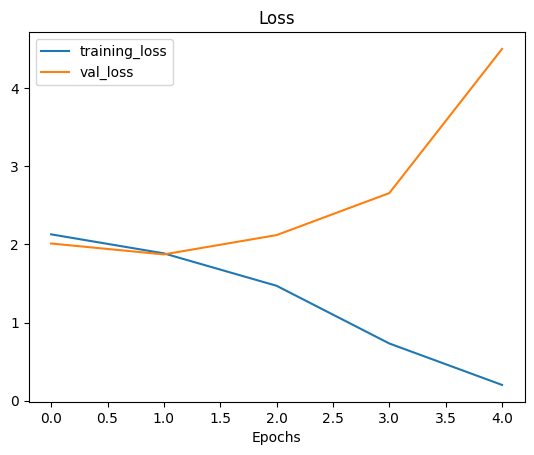

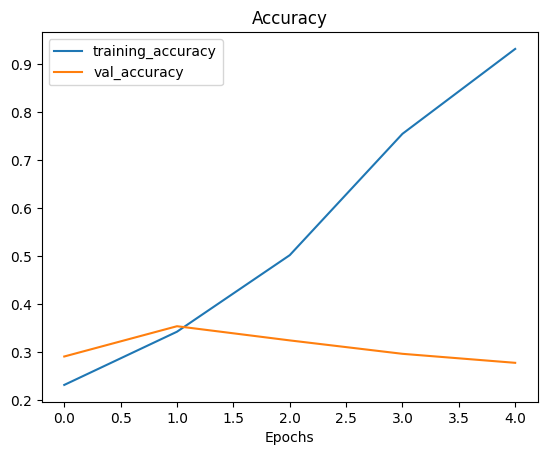

In [8]:
plot_loss_curves(hist)  #Overfitting oldu.

# Adjust the model parameters
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

1. Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

2. Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.


3. Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

4. Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
🔑 Note: Preventing overfitting is also referred to as regularization.

In [9]:
tf.random.set_seed(42)

cnn_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,

     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,

      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn_2.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist_2 = cnn_2.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 117ms/step - loss: 2.0925 - accuracy: 0.2453 - val_loss: 1.9280 - val_accuracy: 0.3240
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 1.6990 - accuracy: 0.4291 - val_loss: 1.9604 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 1.2404 - accuracy: 0.6056 - val_loss: 2.0686 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 0.7132 - accuracy: 0.7860 - val_loss: 2.3529 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 33s 140ms/step - loss: 0.3244 - accuracy: 0.9137 - val_loss: 2.9012 - val_accuracy: 0.2996


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [11]:
cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

#Trainable parameter çok değişmiyor modelimizden conv layer eksiltmemize rağmen. Burdan da yine overfitting olacağı çıkarımını yapabiliyoruz. (ilk modelde filter 64 oldugu icin cok büyük cıktı parametre normalde onda da 10 filtre kullansam cok yakın cıkacaktı.)

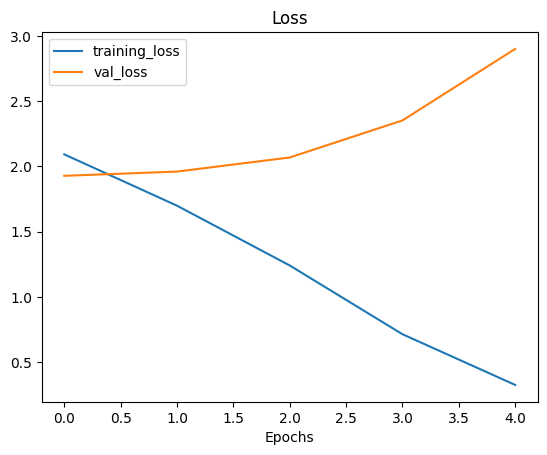

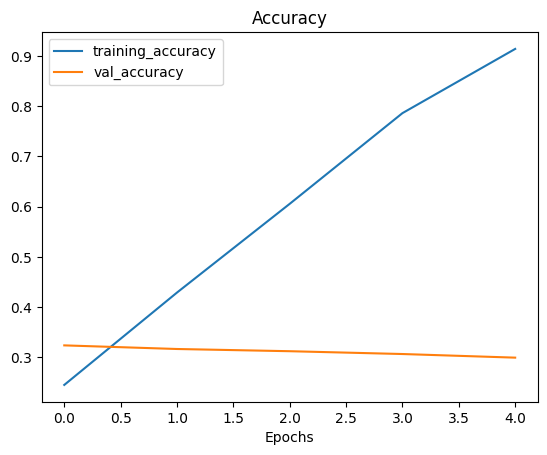

In [12]:
plot_loss_curves(hist_2)

# Conv layer sildik işe yaramadı. Data augmentation yapıcaz.

In [15]:
train_datagen_aug = ImageDataGenerator(rescale = 1./255 ,
                                       rotation_range = 0.2 ,
                                       width_shift_range = 0.2 ,
                                       height_shift_range = 0.2 ,
                                       shear_range = 0.2 ,
                                       zoom_range = 0.2 ,
                                       horizontal_flip = True
                                       )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_aug = train_datagen_aug.flow_from_directory(directory = train_dir ,
                                               target_size = (224,224) ,
                                               batch_size = 32 ,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory( directory = test_dir ,
                                             target_size = (224,224) ,
                                              batch_size = 32 ,
                                              class_mode = "categorical"
                                              )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
tf.random.set_seed(42)

cnn_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,
     tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn_3.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist_3 = cnn_3.fit(train_data_aug , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 462ms/step - loss: 2.2629 - accuracy: 0.1504 - val_loss: 2.1335 - val_accuracy: 0.2216
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.1462 - accuracy: 0.2136 - val_loss: 2.0393 - val_accuracy: 0.2636
Epoch 3/5
235/235 [==============================] - 109s 460ms/step - loss: 2.0580 - accuracy: 0.2689 - val_loss: 1.9321 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 105s 449ms/step - loss: 1.9854 - accuracy: 0.3033 - val_loss: 1.7878 - val_accuracy: 0.3872
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9283 - accuracy: 0.3329 - val_loss: 1.7452 - val_accuracy: 0.4004


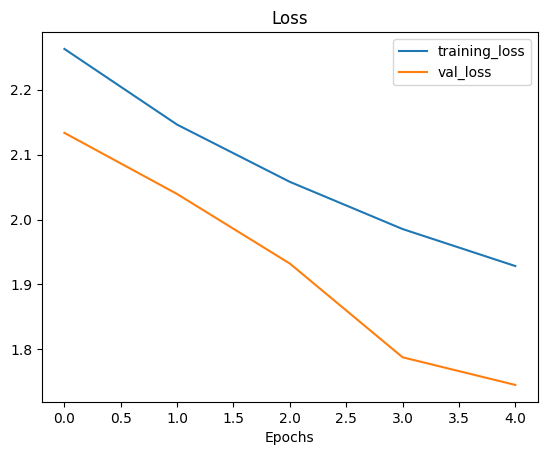

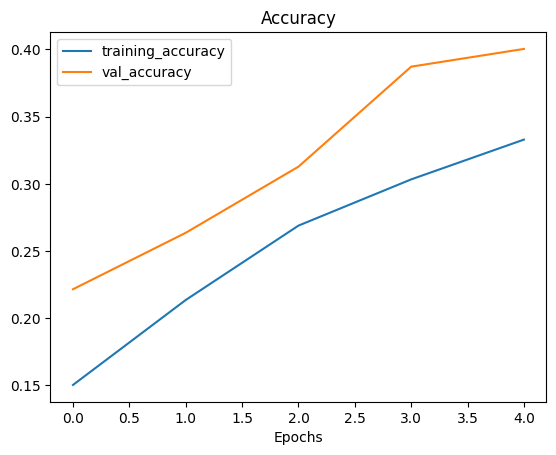

In [18]:
plot_loss_curves(hist_3)